In [58]:
# Pandas is a library for basic data analysis
import pandas as pd
# NumPy is a library for advance mathematical computation
import numpy as np
# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt
# SeaBorn is a library for advance data visualization
import seaborn as sns


sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)


In [45]:
! ls datasets

AAPL.csv                Presidents.xls          tennis.txt
AirPassengers.csv       apple_quandl.pkl        titanic.csv
AppleStore.csv          bigml_telecom_churn.csv
Iris.csv                bmi.csv


In [46]:
FILEPATH = "datasets/AppleStore.csv"

df = pd.read_csv(FILEPATH, index_col="Unnamed: 0")
df
df.iloc[0] 
df.loc[1] #.iloc[] and .loc[] are powerful selector tools in Pandas that allow you to view either a single or multiple rows, columns, and/or cells in a dataset.
# .iloc[] is useful for selecting data by index.
# df.loc[3], rather than selecting the row defined by the third index, it selected the row defined by the number 3 occurring in the leftmost column, which happens to be the second index!

# These selector methods also support slicing
df.iloc[:3] 
df.loc[:3]

df.head() # You can peek at the top of a DataFrame 
df.tail() # You can peek at the bottom of a DataFrame 

df.price.mean() # 1.726

df.describe() # The .describe() method in Pandas is powerful, but one restriction is that without any specific keyword arguments, it describes and returns descriptive statistics on columns that only contain numerical data (ints, floats).

df.describe(include="O") # we want to know about trends across our non-numeric data

df = df.drop("currency", axis="columns")



# def _byte_resizer(data):
#     return np.around(data / 1000000, decimals=2)

# df["size_Mb"] = df["size_bytes"].apply(_byte_resizer)
# df.drop("size_bytes", axis="columns", inplace=True)

# Notice how in the previous cell, we wrote a custom helper function _byte_resizer() that contained our logic for grabbing size_bytes data and dividing it effectively to give us our new size_Mb column


# For instance, take a look at the following command. It does the exact same thing as the previous cell, but is written quite differently using more advanced Python syntax that may not be as nice for readability:
df["size_Mb"] = df["size_bytes"].apply(lambda num: np.around(num / 1000000, decimals=2))
df.drop("size_bytes", axis="columns", inplace=True)



# Let's explore the distribution of apps based on file size.

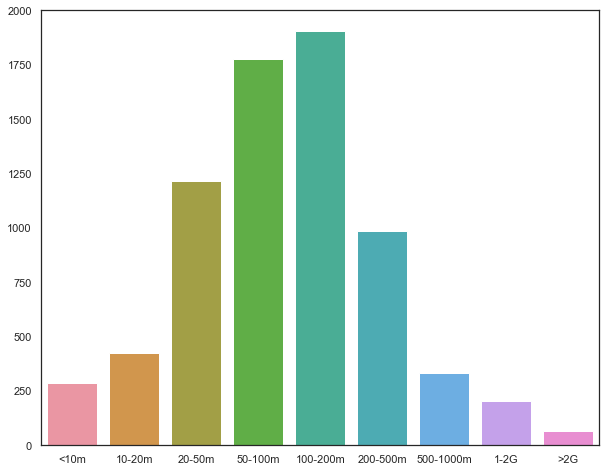

In [47]:
# let's set up the plotting space in a new cell
plt.subplots(figsize=(10, 8))

# let's initialize the bins by which our histogram data will fall
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]

# let's produce our plotting object of frequency counts and use SeaBorn to visualize it for us
freqs = pd.cut(df["size_Mb"], BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

# Looks great! Let's take a further look into priced vs. unpriced apps on the mobile store.

(-1.1057396083108322,
 1.1002733599434824,
 -1.1276675874208923,
 1.1112839653444184)

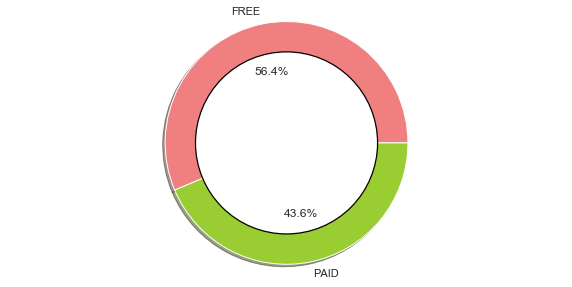

In [48]:
# First things first, let's set up our parameters in a new cell.
# We want to look at two main categories: whether or not an app is free or paid

BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']


# Let's run a quick script to add a column containing free vs. paid price attributes for ease of use.
df["price_categories"] = pd.cut(df["price"], BINS, include_lowest=True, labels=LABELS)
fig, axs = plt.subplots(figsize=(10, 5))


# For easier reference, we'll slice our DataFrame to easily grab the data we want to look at.
price_df = df["price_categories"].value_counts()


# Finally, we'll generate a nice looking doughnut plot in MatPlotLib by plotting our data using a standard pie chart, 
# then modifying the chart with a superimposed white circle to give the visualization some pizzazz.
plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

# Let's keep moving with this idea and check out the highest rated free and paid apps.

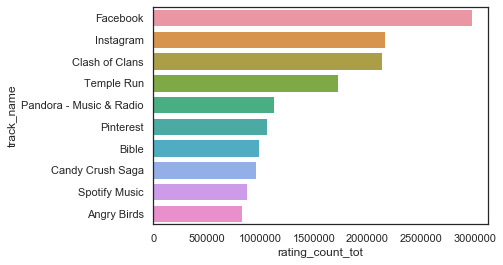

In [49]:
# First things first: let's slice our categorical price data into two objects based on category in a new cell.
free_apps = df.loc[df["price_categories"] == "FREE"]
paid_apps = df.loc[df["price_categories"] == "PAID"]

# From here, let's sort our sliced categorical price data based on total user ratings to get two new objects in a new cell.
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)


# Now that we have our rated free and rated paid apps objects, let's visualize them one at a time.
# For the sake of clarity, we'll only visualize the top ten highest rated apps in each category.
# First, let's look at free apps. (Feel free to put this in a new cell.)

sns.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

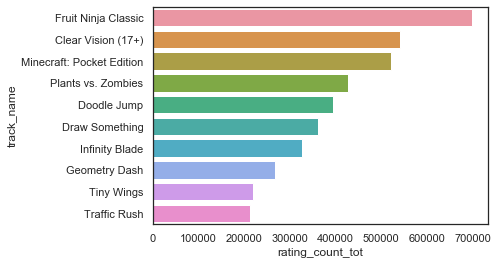

In [50]:
# Next, let's take a look at paid apps. Put it in a new cell.
sns.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])

# By the way, what if we just want to know the highest rated apps of all time, regardless of price?

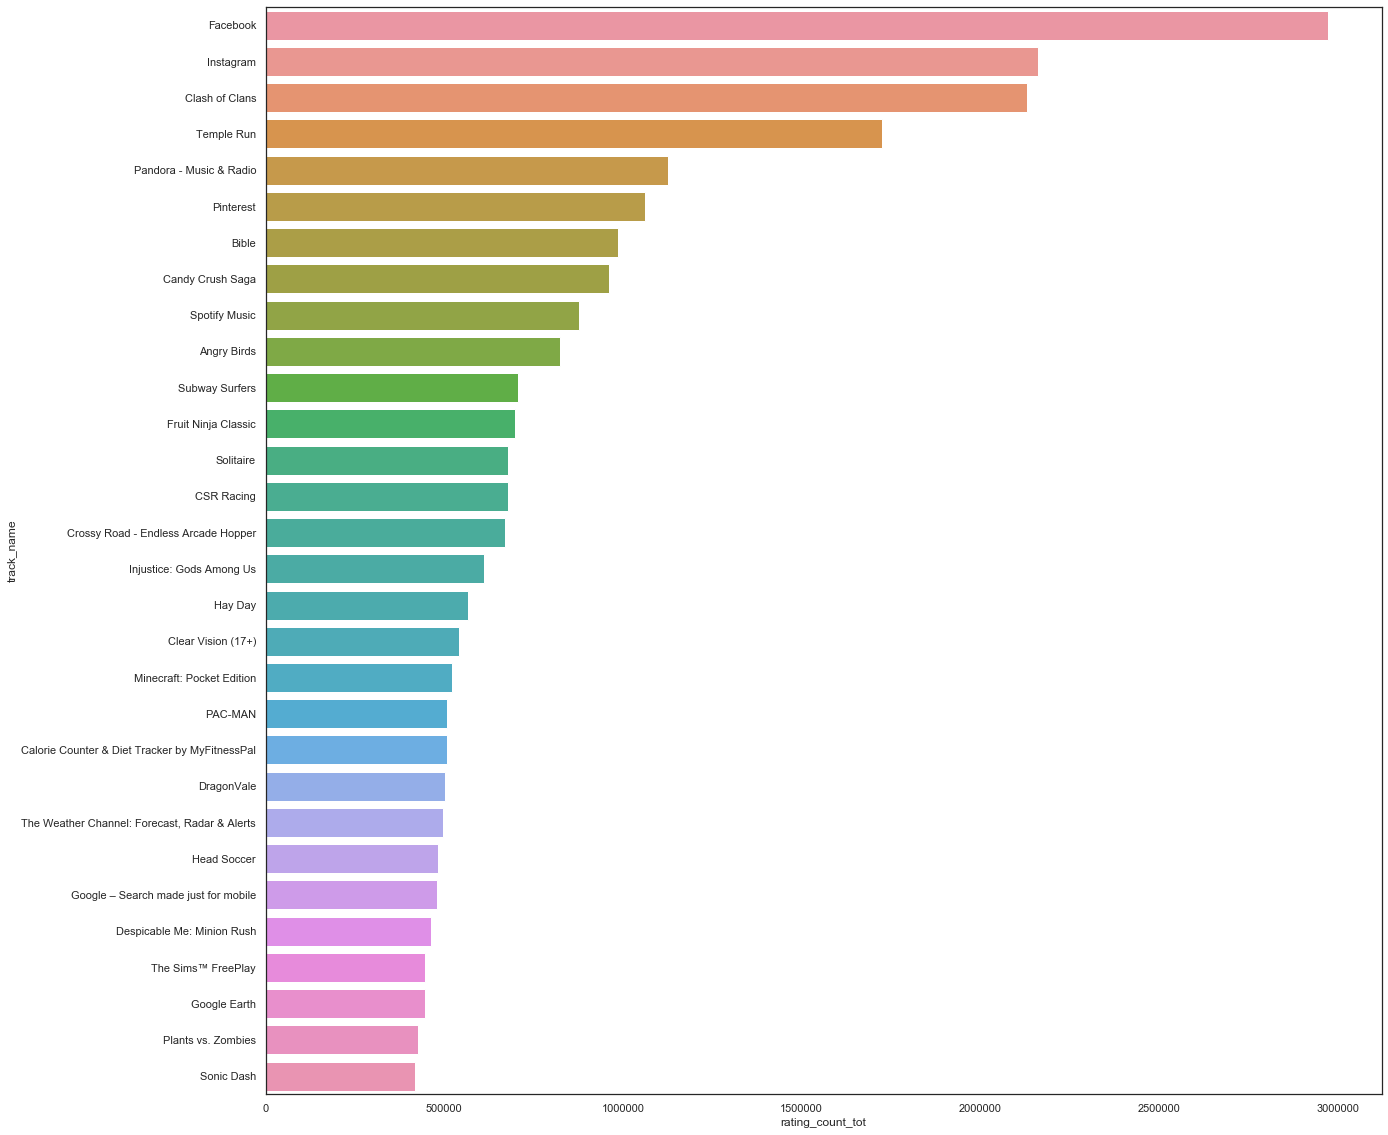

In [51]:
#First, let's initialize our plotting space. New cell!
plt.subplots(figsize=(20, 20))

# Next, let's grab our data sorted by ratings as an object. In a new cell.
ratings = df.sort_values(by=["rating_count_tot"], ascending=False)

# Finally, let's plot it!
sns.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])

# Part 3: Exploratory Data Science (finale)

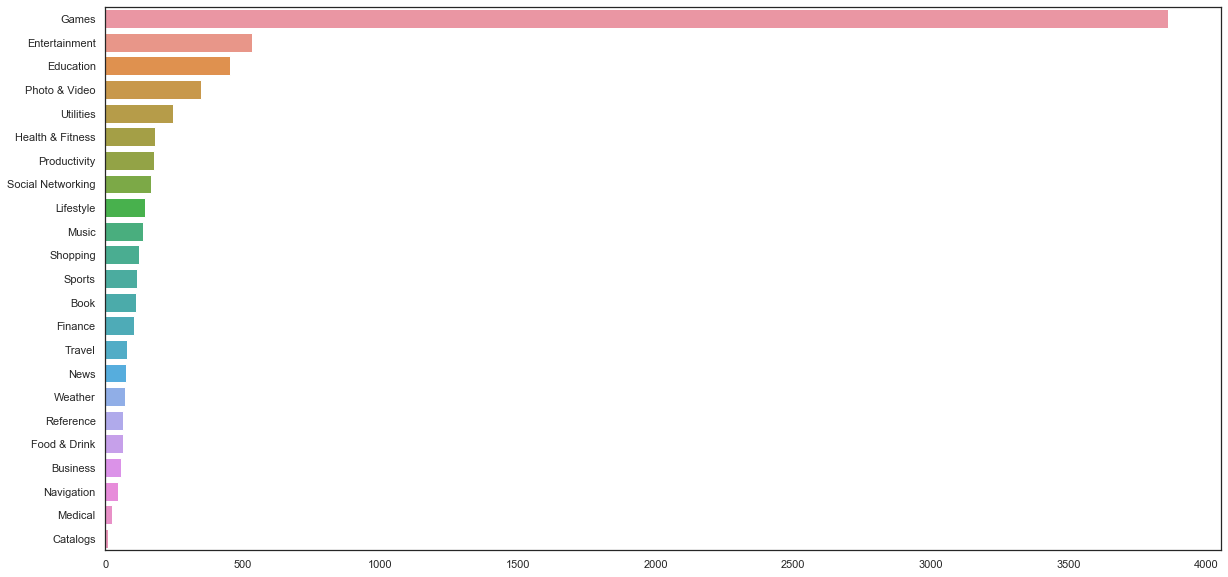

In [52]:
# First, let's visualize the distribution of apps based on genre to see how many games we're contending with! Please put this in a new cell.

genres = df["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [53]:
# Let's slice our data to grab only the mobile games and take a look at our data before moving forward. New cell.

games = df.loc[df["prime_genre"] == "Games"]
games.head()

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_Mb,price_categories
1,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.79,PAID
6,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,10.49,PAID
10,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,70.02,PAID
11,284791396,Solitaire by MobilityWare,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,49.62,PAID
12,284815117,SCRABBLE Premium,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1,227.55,PAID


## Let's explore price a little deeper by exploring the distribution of mobile games by price.
### First things first: let's set up our object in a new cell to hold mobile game data by price.

[Text(0, 0.5, 'percent (%)'), Text(0.5, 0, 'USD')]

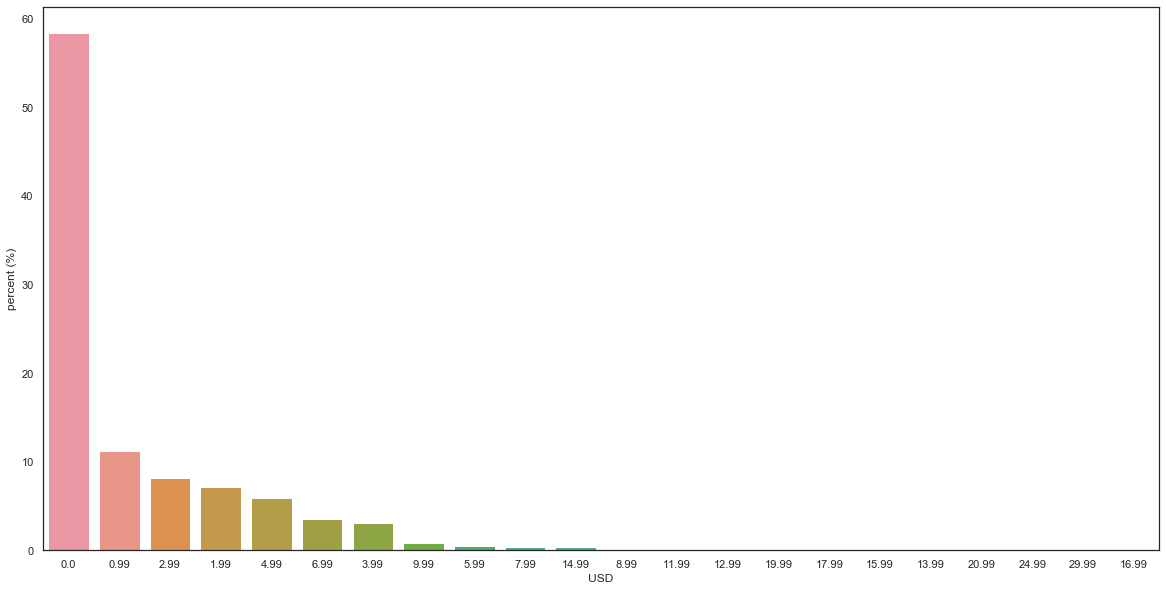

In [54]:
prices = (games["price"].value_counts()) / (games["price"].shape[0]) * 100
prices.sort_values(ascending=False, inplace=True)


# Now, let's initialize our plotting space in a new cell and create a barplot to visualize our data.
plt.subplots(figsize=(20, 10))
ax = sns.barplot(y=prices.values, x=prices.index, order=prices.index)
ax.set(xlabel="USD", ylabel="percent (%)")

## Speaking of price, let's close off our tutorial with some final visualizations looking at mobile game popularity.
## Let's first look into the top rated mobile games by price category.

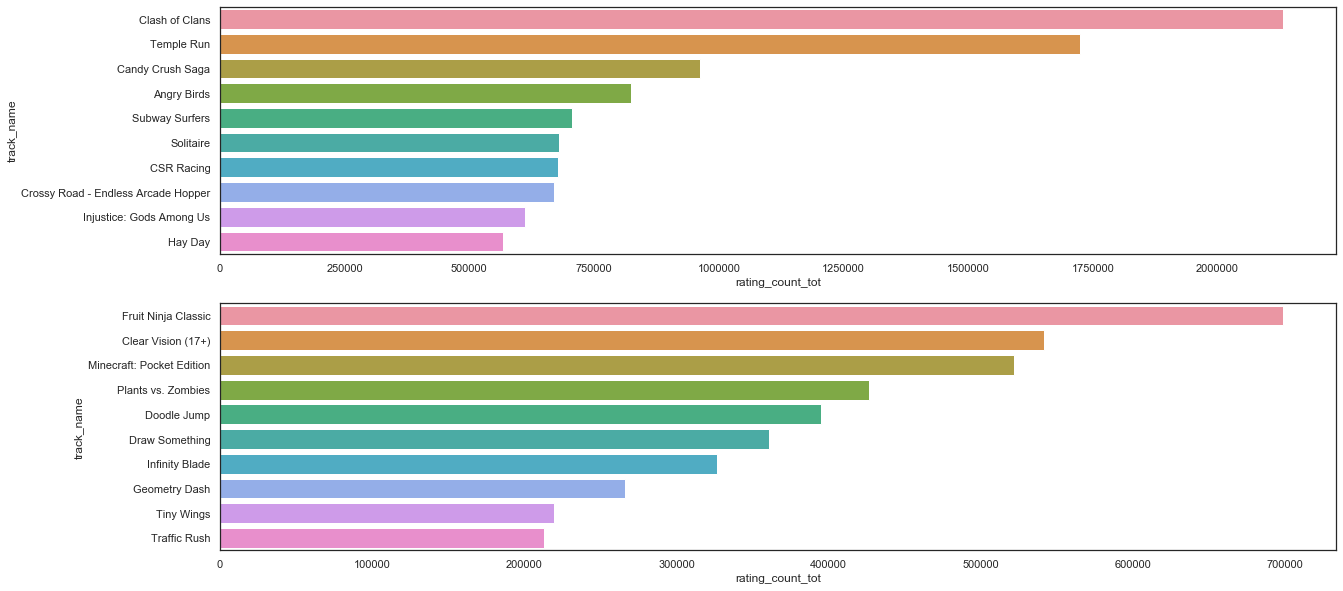

In [55]:
# First things first: let's grab our categorical objects and sort them by total ratings. (Let's do this in a new cell!)

free_games = games.loc[games["price_categories"] == "FREE"]
paid_games = games.loc[games["price_categories"] == "PAID"]


free_games_rated = free_games.sort_values(by=["rating_count_tot"], ascending=False)
paid_games_rated = paid_games.sort_values(by=["rating_count_tot"], ascending=False)

# Then, let's initialize our plotting space (in a new cell), this time using subplots eloquently to display two plots dynamically.

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Finally, let's create two barplots for top rated free and paid mobile apps. In a new cell.

sns.barplot(x=free_games_rated["rating_count_tot"][:10], y=free_games_rated["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated["rating_count_tot"][:10], y=paid_games_rated["track_name"][:10], ax=ax2)



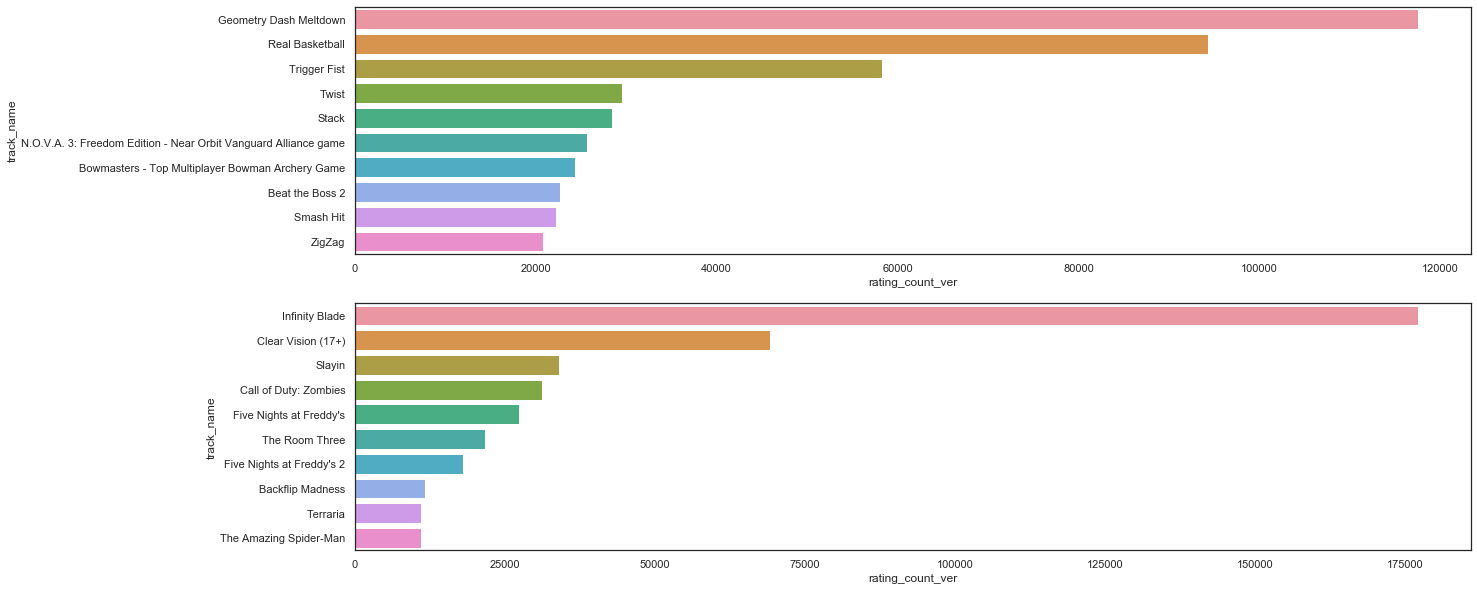

In [57]:
# While this is fine and dandy, keep in mind that currently we are only looking at top rated apps in both categories by total rating.

# For mobile developers, it may also be important to look at top rated apps in both categories by current rating of the latest released version!

# Let's explore that.

# We save those slices as different objects.
free_games_rated_curr = free_games.sort_values(by=["rating_count_ver"], ascending=False)
paid_games_rated_curr = paid_games.sort_values(by=["rating_count_ver"], ascending=False)

# Now let's initialize our plotting space.
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Finally, let's create our barplots in a new cell and display the top ten highest rated apps by current version.
sns.barplot(x=free_games_rated_curr["rating_count_ver"][:10], y=free_games_rated_curr["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated_curr["rating_count_ver"][:10], y=paid_games_rated_curr["track_name"][:10], ax=ax2)